**Importamos las librerias que necestiaremos**
- usamos:
- python 3.13.1
- numpy 2.3.3
- pip 25.2
- matplotlib 3.10.6
- Seaborn 0.13.2
- statsmodel 0.14.5
- STL 0.0.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

from statsmodels.tsa.seasonal import STL
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Cargamos nuestra base de datos en un frame de Pandas**

In [4]:
# Subimos nuestra base de datos, cargamos ambos datasets
df_1 = pd.read_csv("synthetic_mmm_weekly_india_SAT.csv")
df_2 = pd.read_csv("synthetic_mmm_weekly_india.csv")

# Visualizamos el frame
df_1


,Week,Geo,Brand,SKU,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,...,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
0,2022-07-02,CENTRAL,BrandA,BrandA_SKU1,166.737425,15058.472804,90.312495,90.312495,0,0,...,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
1,2022-07-02,CENTRAL,BrandA,BrandA_SKU2,123.326990,11166.439172,90.543353,90.543353,0,0,...,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
2,2022-07-02,CENTRAL,BrandA,BrandA_SKU3,74.232953,7829.352426,105.470039,105.470039,0,0,...,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
3,2022-07-02,CENTRAL,BrandB,BrandB_SKU1,216.583770,15986.585046,73.812479,73.812479,0,0,...,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
4,2022-07-02,CENTRAL,BrandB,BrandB_SKU2,272.920195,22565.283219,82.680885,82.680885,0,0,...,75.635370,86.521710,0.456192,0.360998,33.709720,2.986547,118.843878,5.464558,0.934774,4.587544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,2025-06-21,WEST,BrandB,BrandB_SKU2,464.265398,34966.742688,83.973091,75.316280,0,1,...,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11228,2025-06-21,WEST,BrandB,BrandB_SKU3,1102.182610,72163.074413,73.688403,65.472884,0,1,...,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11229,2025-06-21,WEST,BrandC,BrandC_SKU1,1144.234814,54845.202065,55.653890,47.931772,0,1,...,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286
11230,2025-06-21,WEST,BrandC,BrandC_SKU2,318.221874,15948.330673,58.023703,50.117016,0,1,...,56.761921,63.238274,0.773801,0.932547,89.784799,3.990173,137.776968,4.439521,0.945333,5.147286


**Revisamos las carracterisitcas generales del dataset**

In [5]:
# Dimenciones  
print(f"Sus dimensiones son:\n\ndf_1: {df_1.shape}\ndf_2: {df_2.shape}")
print(" ")

# comparación de nombres de columnas (ignorando el orden)
print("Tienen la misma cantidad de columnas con los mismos nombres:", set(df_1.columns) == set(df_2.columns))
print(" ")


Sus dimensiones son:

df_1: (11232, 28)
df_2: (11232, 28)
 
Tienen la misma cantidad de columnas con los mismos nombres: True
 


**Buscamos:**
- Tipos de datos. 
- Valores nulos.
- Valores duplicados. 
- Uso de memoria.

In [6]:
print(f"Informacion del primer data set:---------------------\n")
df_1.info()
print(" ")

print(f"Informacion del segundo data set:---------------------\n")
df_2.info()
print(" ")

# Verificamos si hay valores nulos en ambos DataFrames
print(f"Valores nulos en df_1:\n{df_1.isnull().sum()}\n")
print(f"Valores nulos en df_2:\n{df_2.isnull().sum()}\n")

# Veriuficamos si hay duplicados en ambos DataFrames    
print(f"Duplicados en df_1: {df_1.duplicated().sum()}")
print(f"Duplicados en df_2: {df_2.duplicated().sum()}")



Informacion del primer data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     11232 non-null  object 
 1   Geo                      11232 non-null  object 
 2   Brand                    11232 non-null  object 
 3   SKU                      11232 non-null  object 
 4   Sales_Units              11232 non-null  float64
 5   Sales_Value              11232 non-null  float64
 6   MRP                      11232 non-null  float64
 7   Net_Price                11232 non-null  float64
 8   Feature_Flag             11232 non-null  int64  
 9   Display_Flag             11232 non-null  int64  
 10  TPR_Flag                 11232 non-null  int64  
 11  Trade_Spend              11232 non-null  float64
 12  TV_Impressions           11232 non-null  float64
 13  YouTube_Impressions  

**Cambiamos el tipo de dato de la columna "week"**

In [7]:
df_1["Week"] = pd.to_datetime(df_1["Week"], errors="coerce")
df_2["Week"] = pd.to_datetime(df_2["Week"], errors="coerce")

# Verificamos si hay valores nulos en ambos DataFrames
print("NaT en df_1.Week:", df_1["Week"].isna().sum())
print("NaT en df_2.Week:", df_2["Week"].isna().sum())
print(" ")

# Revisamos el cambio
print(f"Informacion del primer data set:---------------------\n")
df_1.info()
print(" ")

print(f"Informacion del segundo data set:---------------------\n")
df_2.info()
print(" ")

NaT en df_1.Week: 0
NaT en df_2.Week: 0
 
Informacion del primer data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     11232 non-null  datetime64[ns]
 1   Geo                      11232 non-null  object        
 2   Brand                    11232 non-null  object        
 3   SKU                      11232 non-null  object        
 4   Sales_Units              11232 non-null  float64       
 5   Sales_Value              11232 non-null  float64       
 6   MRP                      11232 non-null  float64       
 7   Net_Price                11232 non-null  float64       
 8   Feature_Flag             11232 non-null  int64         
 9   Display_Flag             11232 non-null  int64         
 10  TPR_Flag                 11232 non-null  int64         
 

- Notamos que tenemos datos **"object"** asi que para reducir el espacio en memoria los cambiaremos a **"category"**
- Estandarizaremos el texto a todos en mayusculas

In [8]:
# Selecciona explícitamente 3 columnas por nombre
cols = ['Geo','Brand','SKU']
df_1[cols]
print(df_1[cols])

# Estandarizamos los textos a mayusculas y cambiamos a tipo "category"
for col in cols:
    df_1[col] = df_1[col].str.upper().astype('category')
    df_2[col] = df_2[col].str.upper().astype('category')

# Revisamos el cambio
print(f"Informacion del primer data set:---------------------\n")
df_1.info()
print(" ")
print(f"Informacion del segundo data set:---------------------\n")
df_2.info()





           Geo   Brand          SKU
0      CENTRAL  BrandA  BrandA_SKU1
1      CENTRAL  BrandA  BrandA_SKU2
2      CENTRAL  BrandA  BrandA_SKU3
3      CENTRAL  BrandB  BrandB_SKU1
4      CENTRAL  BrandB  BrandB_SKU2
...        ...     ...          ...
11227     WEST  BrandB  BrandB_SKU2
11228     WEST  BrandB  BrandB_SKU3
11229     WEST  BrandC  BrandC_SKU1
11230     WEST  BrandC  BrandC_SKU2
11231     WEST  BrandC  BrandC_SKU3

[11232 rows x 3 columns]
Informacion del primer data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     11232 non-null  datetime64[ns]
 1   Geo                      11232 non-null  category      
 2   Brand                    11232 non-null  category      
 3   SKU                      11232 non-null  category      
 4   Sales_U

**Revisamos que ambas bases de datos no sean identicas**

In [39]:
# Comparamos ambos DataFrames
comparison = df_1.equals(df_2)
print(f"¿Los DataFrames son idénticos? {comparison}")

¿Los DataFrames son idénticos? False


**Ahora buscaremos cuales son las diferentes categorias de mis columnas categoricas** 

In [36]:
clos_cat = ['Geo','Brand','SKU']
for i in clos_cat:
    c1 = df_1[i].cat.categories
    c2 = df_2[i].cat.categories
    
    print(f"Categorias en '{i}' del df_1:\n",list(c1))
    print(" ")
    print(f"Categorias en '{i}' del df_2:\n",list(c2))
    print(" ")
    print("------------------------------------------------------------------------------------------------------------------------------------------")

for i in clos_cat:
    print(f"Cantidad de categorias en '{i}' del df_1:", df_1[i].nunique())
    print(f"Cantidad de categorias en '{i}' del df_2:", df_2[i].nunique())
    print(" ")
    
    

Categorias en 'Geo' del df_1:
 ['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']
 
Categorias en 'Geo' del df_2:
 ['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']
 
------------------------------------------------------------------------------------------------------------------------------------------
Categorias en 'Brand' del df_1:
 ['BRANDA', 'BRANDB', 'BRANDC']
 
Categorias en 'Brand' del df_2:
 ['BRANDA', 'BRANDB', 'BRANDC']
 
------------------------------------------------------------------------------------------------------------------------------------------
Categorias en 'SKU' del df_1:
 ['BRANDA_SKU1', 'BRANDA_SKU2', 'BRANDA_SKU3', 'BRANDB_SKU1', 'BRANDB_SKU2', 'BRANDB_SKU3', 'BRANDC_SKU1', 'BRANDC_SKU2', 'BRANDC_SKU3']
 
Categorias en 'SKU' del df_2:
 ['BRANDA_SKU1', 'BRANDA_SKU2', 'BRANDA_SKU3', 'BRANDB_SKU1', 'BRANDB_SKU2', 'BRANDB_SKU3', 'BRANDC_SKU1', 'BRANDC_SKU2', 'BRANDC_SKU3']
 
------

**Revisamos todas las columnas numericas y al mismo tiempo obtenemos valores estadisticos como...**
- Count
- Mean
- Min
- 25%
- 50%
- 75%
- Max
- Std

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_1.describe() 


,Week,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,TPR_Flag,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
count,11232,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,1.123200e+04,1.123200e+04,1.123200e+04,11232.000000,11232.000000,1.123200e+04,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000
mean,2023-12-26 12:00:00,409.144276,32453.433540,79.687066,78.108492,0.186699,0.184295,0.158654,56784.061640,1.031174e+06,4.919045e+05,3.890921e+05,137290.113612,91547.116108,3.153335e+05,70.372429,65.332445,0.646951,0.670508,65.049250,4.396893,132.280576,5.082094,1.683299,2.151666
min,2022-07-02 00:00:00,29.971872,2566.350247,52.906281,46.028997,0.000000,0.000000,0.000000,5326.099777,1.251198e+05,3.918010e+04,3.692248e+04,20539.510699,9924.996431,2.922427e+04,48.560626,30.066035,0.312468,0.313900,27.705402,2.578997,114.873524,3.488797,0.934774,0.343123
25%,2023-03-30 06:00:00,198.665547,14754.451778,63.358215,62.805069,0.000000,0.000000,0.000000,13014.249886,4.446529e+05,2.126797e+05,1.638624e+05,72662.788288,37999.572631,1.333769e+05,63.573587,55.580581,0.512283,0.527513,50.389215,3.816038,126.449164,4.686955,0.976820,0.954376
50%,2023-12-26 12:00:00,325.212428,24592.362351,79.790936,78.143183,0.000000,0.000000,0.000000,21045.395175,7.716231e+05,3.633789e+05,2.775063e+05,113585.195039,66694.612924,2.268250e+05,70.205004,66.091909,0.636878,0.655696,63.424177,4.348179,132.438203,5.044538,1.139112,1.285723
75%,2024-09-22 18:00:00,528.543722,40811.772659,93.308157,91.933471,0.000000,0.000000,0.000000,80548.805525,1.226365e+06,6.103292e+05,5.043419e+05,177300.557401,116369.664007,3.855884e+05,76.468158,75.414566,0.766018,0.792686,77.774855,4.918074,137.780111,5.493578,2.477604,3.791379
max,2025-06-21 00:00:00,3334.884340,262753.520416,112.783671,112.783671,1.000000,1.000000,1.000000,481378.091967,6.064175e+06,3.004404e+06,2.800156e+06,666264.211071,622434.632084,2.094573e+06,94.397584,96.572017,1.000000,1.000000,115.761797,7.762666,148.898300,6.614460,3.553047,6.166558
std,NaN,306.305614,27000.516407,16.358434,16.438529,0.389687,0.387742,0.365369,66045.213932,8.945035e+05,4.052517e+05,3.369887e+05,88369.160508,83550.305364,2.791599e+05,9.148711,12.803109,0.167785,0.171485,18.578824,0.787389,7.696734,0.554610,0.936699,1.583922


**Grafico de caja y vigotes para ver los valores extremos de cada columna numerica**

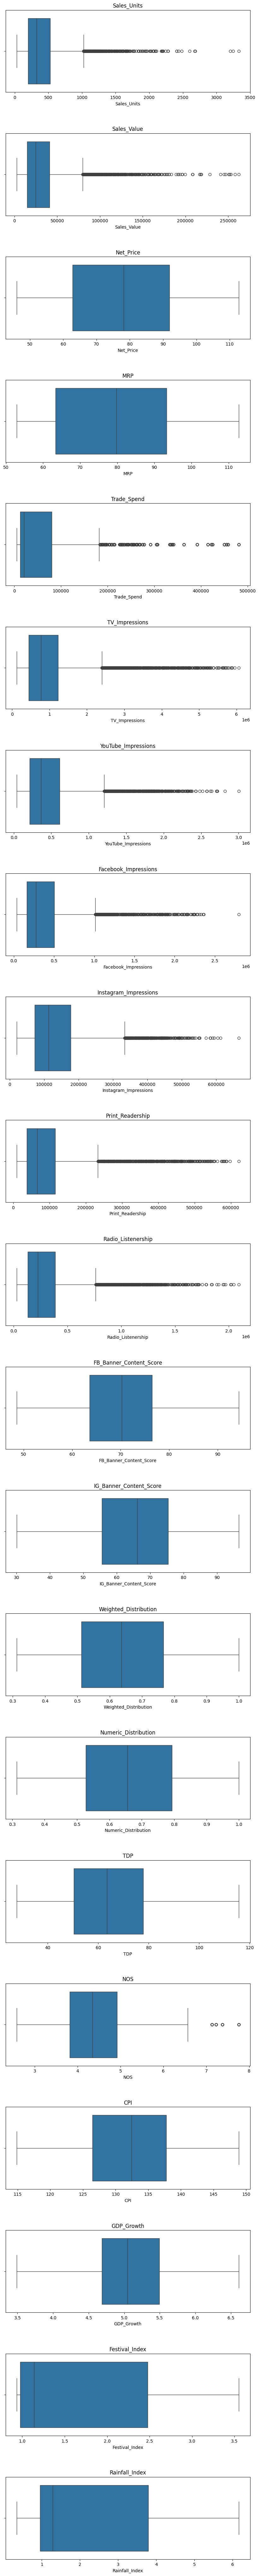

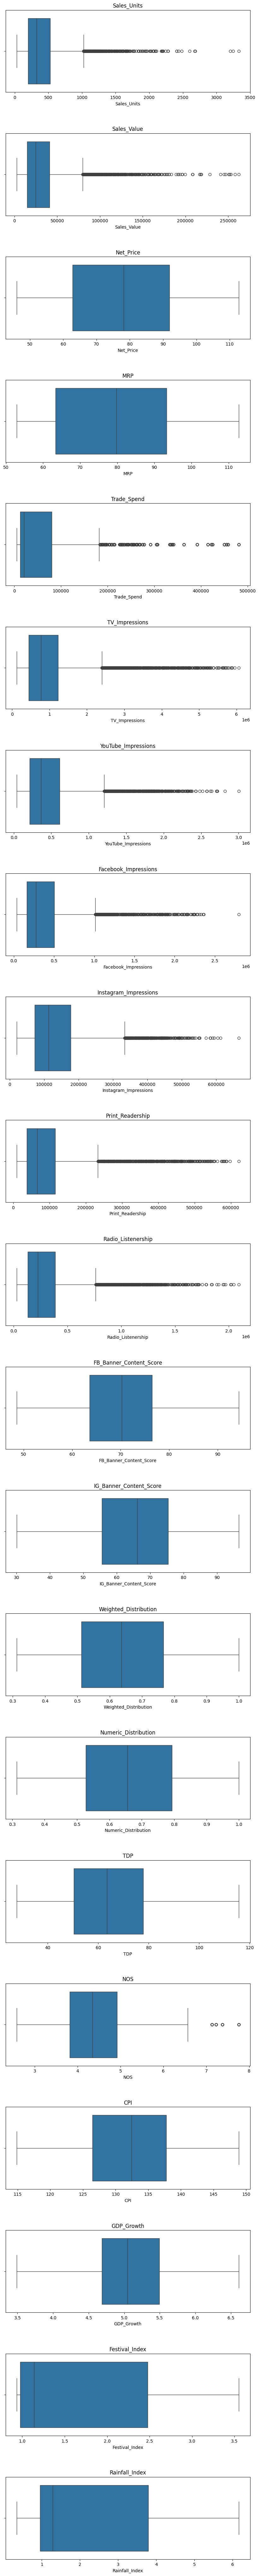

In [ ]:
# Seleccionamos columnas numericas
# num_cols = df_1.select_dtypes(include=['number']).columns
# print("Columnas numéricas:", list(num_cols))


columns_numericas_df_1 = ['Sales_Units', 'Sales_Value','Net_Price', 'MRP', 'Trade_Spend', 'TV_Impressions', 'YouTube_Impressions', 'Facebook_Impressions', 'Instagram_Impressions', 'Print_Readership', 'Radio_Listenership', 'FB_Banner_Content_Score', 'IG_Banner_Content_Score', 'Weighted_Distribution', 'Numeric_Distribution', 'TDP', 'NOS', 'CPI', 'GDP_Growth', 'Festival_Index', 'Rainfall_Index']

columns_numericas_df_2 = ['Sales_Units', 'Sales_Value','Net_Price', 'MRP', 'Trade_Spend', 'TV_Impressions', 'YouTube_Impressions', 'Facebook_Impressions', 'Instagram_Impressions', 'Print_Readership', 'Radio_Listenership', 'FB_Banner_Content_Score', 'IG_Banner_Content_Score', 'Weighted_Distribution', 'Numeric_Distribution', 'TDP', 'NOS', 'CPI', 'GDP_Growth', 'Festival_Index', 'Rainfall_Index']

n1 = len(columns_numericas_df_1)
n2 = len(columns_numericas_df_2)

# Graficos de caja y bigotes para el primer DataFrame ---------------------------------------------
fig,ax = plt.subplots(nrows=n1, ncols=1, figsize=(10,5*n1))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_numericas_df_1):
    sns.boxplot(x=col, data=df_1, ax=ax[i])   # horizontal (x=col). Para vertical, usa y=col.
    ax[i].set_title(col)

# Graficos de caja y bigotes para el segundo DataFrame ---------------------------------------------
fig,ax = plt.subplots(nrows=n1, ncols=1, figsize=(10,5*n1))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_numericas_df_1):
    sns.boxplot(x=col, data=df_1, ax=ax[i])   # horizontal (x=col). Para vertical, usa y=col.
    ax[i].set_title(col)




** Creamos graficas de correlacion de los datos**
- Primero buscaremos sumar todos los datos numericos como [Sales_Units", "Sales_Value", "TV_Impressions", "YouTube_Impressions]

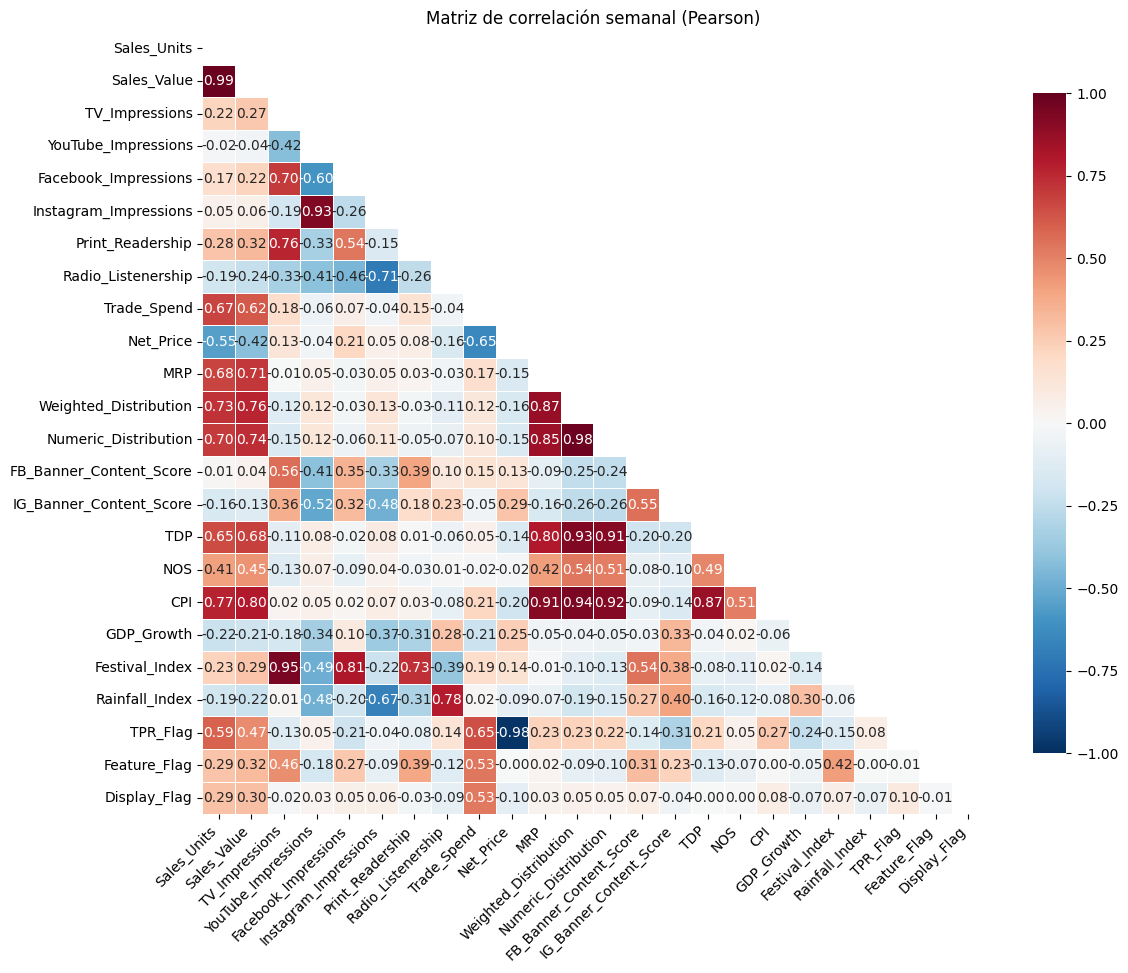

In [75]:
df = df_1.copy()

sum_cols  = ["Sales_Units","Sales_Value","TV_Impressions","YouTube_Impressions",
            "Facebook_Impressions","Instagram_Impressions","Print_Readership",
            "Radio_Listenership","Trade_Spend"]

mean_cols = ["Net_Price","MRP","Weighted_Distribution","Numeric_Distribution",
            "FB_Banner_Content_Score","IG_Banner_Content_Score",
            "TDP","NOS","CPI","GDP_Growth","Festival_Index","Rainfall_Index"]

flag_cols = ["TPR_Flag","Feature_Flag","Display_Flag"]


agg_map = {}

for c in sum_cols:
    agg_map[c] = "sum"     # se acumula

for c in mean_cols:
    agg_map[c] = "mean"    # nivel/promedio

for c in flag_cols:
    agg_map[c] = "max"     # si alguna fila tuvo 1, la semana queda 1

weekly = df.groupby("Week", as_index=True).agg(agg_map).sort_index()
#display(weekly)

corr_pearson = weekly.corr()      # relación lineal
# corr_pearson.round(3)          # para verlo “bonito”

# corr_spearman = weekly.corr(method="spearman")  # por rangos, más robusta a picos
# corr_spearman.round(3)

corr = corr_pearson  # o corr_spearman
mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo sup.

# plt.figure(figsize=(12,10))
# sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0)
# plt.title("Matriz de correlación semanal (Pearson)")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-)
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()



In [69]:
df_1[["Sales_Value","Facebook_Impressions","Instagram_Impressions","YouTube_Impressions","TV_Impressions","Print_Readership","Radio_Listenership"]].corr()


,Sales_Value,Facebook_Impressions,Instagram_Impressions,YouTube_Impressions,TV_Impressions,Print_Readership,Radio_Listenership
Sales_Value,1.000000,0.415563,0.456635,0.325087,0.458903,0.508635,0.266395
Facebook_Impressions,0.415563,1.000000,0.398860,0.019100,0.733863,0.637572,0.084585
Instagram_Impressions,0.456635,0.398860,1.000000,0.924463,0.391890,0.425447,0.133868
YouTube_Impressions,0.325087,0.019100,0.924463,1.000000,0.122154,0.198777,0.110788
TV_Impressions,0.458903,0.733863,0.391890,0.122154,1.000000,0.820112,0.191176
Print_Readership,0.508635,0.637572,0.425447,0.198777,0.820112,1.000000,0.273482
Radio_Listenership,0.266395,0.084585,0.133868,0.110788,0.191176,0.273482,1.000000


**Grafico de ventas por año de ambos data set**

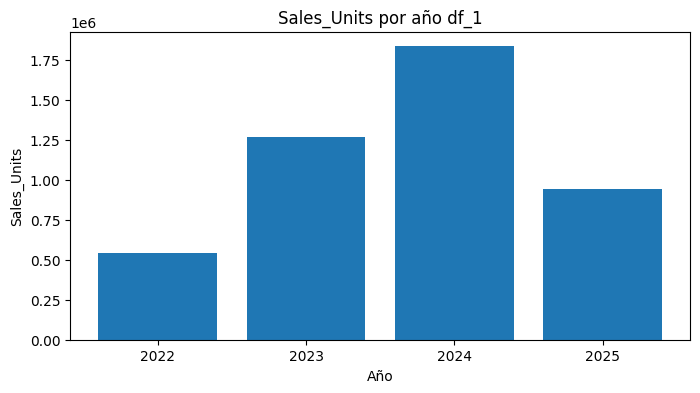

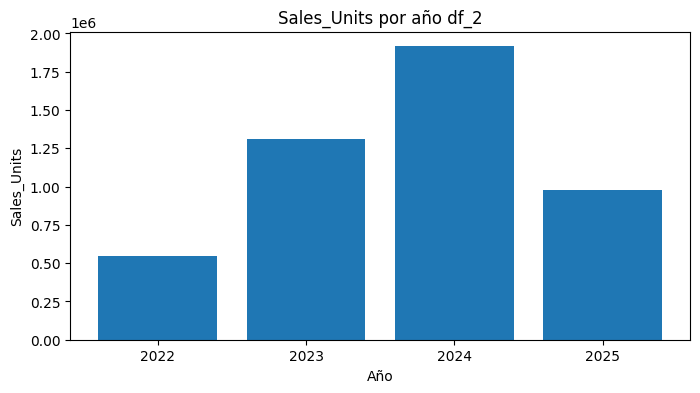

In [16]:
#Grafico de ventas por año en df_1
df = df_1

df = df.copy()
df["Year"] = df["Week"].dt.year
sales_year = df.groupby("Year", as_index=True)["Sales_Units"].sum().sort_index()

plt.figure(figsize=(8,4))
plt.bar(sales_year.index.astype(str), sales_year.values)  # barras

# Etiquetas y título
plt.title("Sales_Units por año df_1")
plt.xlabel("Año")
plt.ylabel("Sales_Units")

# Grafico de ventas por año en df_2
df1 = df_2 
df1 = df1.copy()
df1["Year"] = df1["Week"].dt.year
sales_year = df1.groupby("Year", as_index=True)["Sales_Units"].sum().sort_index()

plt.figure(figsize=(8,4))
plt.bar(sales_year.index.astype(str), sales_year.values)  # barras

# Etiquetas y título
plt.title("Sales_Units por año df_2")
plt.xlabel("Año")
plt.ylabel("Sales_Units")
plt.show()
